# Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Necessary Installations

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 4.6 MB/s 
     |████████████████████████████████| 4.7 MB 56.4 MB/s 
     |████████████████████████████████| 6.6 MB 47.9 MB/s 
     |████████████████████████████████| 365 kB 49.4 MB/s 
     |████████████████████████████████| 1.8 MB 51.9 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 9.1 MB 47.1 MB/s 
     |████████████████████████████████| 596 kB 56.4 MB/s 
     |████████████████████████████████| 101 kB 12.7 MB/s 
     |████████████████████████████████| 181 kB 69.9 MB/s 
     |████████████████████████████████| 157 kB 70.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 157 kB 62.7 MB/s 
     |████████████████████████████████| 157 kB 59.6 MB/s 
     |██████████████████████████████

In [ ]:
# emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
!pip install emoji==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.3 MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49734 sha256=0a25c748da50012f9880cd983b47d442b6ca4751f86195adfdd24b23cd946917
  Stored in directory: /root/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji


# Load the pre-trained Model
It was trained on Twitter Dataset

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
model_path = '/content/drive/MyDrive/bertweet-checkpoint'
model = ClassificationModel('bertweet',model_path,num_labels=2,use_cuda=True)

# Load Validation and Test Dataset

In [ ]:
df_val1 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Swati folder/Reddit_validation_dataset.xlsx')
df_val2 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_test_diff_dataset.xlsx') # This is also considered as test dataset for now, remember that! 
df_val3 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_validation_diff_dataset.xlsx')

df_test = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Reddit_test_dataset Manual Annotation.xlsx')

In [ ]:
frames = [df_val1, df_val2, df_val3]
df_val = pd.concat(frames)

In [ ]:
df_val = df_val.reset_index(drop=True)

In [ ]:
df_val.columns

Index(['id', 'text'], dtype='object')

In [ ]:
# df_val.drop(df_val.index[df_val['id'] == 'li8y5a'], inplace=True) # This is a dirty entry and so should be deleted
# df_val.drop(df_val.index[df_val['id'] == 'k00q2a'], inplace=True)  # This is a dirty entry and so should be deleted

In [ ]:
# df_val = df_val.reset_index(drop=True)

In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
# nltk.download('stopwords')

In [ ]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

In [ ]:
# df_val['text_w/o_stopwords'] = df_val['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df_val['text_w/o_punctuations'] = df_val['text_w/o_stopwords'].str.replace(r'[^\w\s]+', '')

In [ ]:
n = 128
df_val['split_text'] = ''
for i in range(len(df_val)):
  current_text = df_val['text'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  df_val['split_text'][i] = current_text_split

In [ ]:
df_val.shape

(2683, 3)

# Preditions on Validation Dataset

In [ ]:
df_val['predictions'] = ''
df_val['Model Label'] = ''

In [ ]:
# FOR df_val DATASET
for i in range(len(df_val)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=df_val['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  df_val['predictions'][i] = predictions
  
  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    df_val['Model Label'][i] = 1
  else:
    df_val['Model Label'][i] = 0
  
  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

In [ ]:
df_val['Model Label'].value_counts()

1    1574
0    1109
Name: Model Label, dtype: int64

In [ ]:
df_val.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by BERTweet Model/bertweet_predicted_validation_reddit_dataset.xlsx', index = False) #Exporting the validation dataset with predictions

# Predictions on Test Dataset & Confusion Matrix

In [ ]:
df_test.shape

(302, 3)

In [ ]:
df_test.columns

Index(['id', 'text', 'Y or N Self-Reporting Migraine'], dtype='object')

In [ ]:
df_test['Y or N Self-Reporting Migraine'].value_counts()

Y    226
N     76
Name: Y or N Self-Reporting Migraine, dtype: int64

In [ ]:
# Convert all 'Y' to 1 and 'N' to 0
df_test['Y or N Self-Reporting Migraine'].replace({'Y':1,'N':0},inplace=True) 

In [ ]:
Y_test=df_test['Y or N Self-Reporting Migraine']

In [ ]:
test_text=list(df_test['text'])

In [ ]:
predictions, raw_outputs = model.predict(test_text)

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
import numpy as np

def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))

def softmax(x, axis=None):
    x = x - x.max(axis=axis, keepdims=True)
    y = np.exp(x)
    return y / y.sum(axis=axis, keepdims=True)

In [ ]:
pre=pd.DataFrame(predictions,columns = {'0':'Pre'})
probas = np.asarray(raw_outputs)
probas=softmax(probas, axis=1)
probas

array([[0.04459758, 0.95540242],
       [0.06359858, 0.93640142],
       [0.78996377, 0.21003623],
       [0.35270326, 0.64729674],
       [0.94386722, 0.05613278],
       [0.98390913, 0.01609087],
       [0.06626642, 0.93373358],
       [0.82010955, 0.17989045],
       [0.06383161, 0.93616839],
       [0.05572029, 0.94427971],
       [0.32519901, 0.67480099],
       [0.85256761, 0.14743239],
       [0.10383947, 0.89616053],
       [0.1154611 , 0.8845389 ],
       [0.90796714, 0.09203286],
       [0.08609269, 0.91390731],
       [0.07864238, 0.92135762],
       [0.05893884, 0.94106116],
       [0.05893884, 0.94106116],
       [0.52838132, 0.47161868],
       [0.06483088, 0.93516912],
       [0.90009155, 0.09990845],
       [0.05094091, 0.94905909],
       [0.04385456, 0.95614544],
       [0.64846635, 0.35153365],
       [0.07978201, 0.92021799],
       [0.05770532, 0.94229468],
       [0.05237608, 0.94762392],
       [0.86293023, 0.13706977],
       [0.09105828, 0.90894172],
       [0.

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

           0       0.70      0.68      0.69        76
           1       0.89      0.90      0.90       226

    accuracy                           0.85       302
   macro avg       0.80      0.79      0.80       302
weighted avg       0.85      0.85      0.85       302

overall Accuracy: 0.847682119205298


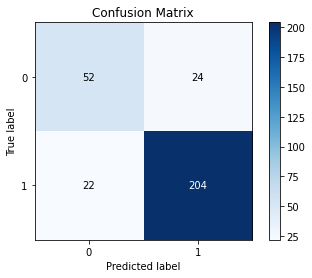

--------------------------


In [ ]:
import scikitplot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Y_test=Y_test
predicted= pre

cm = confusion_matrix(Y_test, predicted)
accuracy =accuracy_score(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)
print('overall Accuracy:',accuracy)
scikitplot.metrics.plot_confusion_matrix(Y_test,  predicted)
plt.show()

print('--------------------------')

In [ ]:
df_test.shape

(302, 3)

In [ ]:
df_test = pd.concat([df_test, predicted], axis=1)

In [ ]:
df_test.shape

(302, 4)

In [ ]:
df_test.columns

Index(['id', 'text', 'Y or N Self-Reporting Migraine', '0'], dtype='object')

In [ ]:
df_test.rename(columns = {'Y or N Self-Reporting Migraine':'Manual labels', '0':'Model predicted label'}, inplace = True)

In [ ]:
df_test['Model predicted label'].value_counts() #this is what model predicted

1    228
0     74
Name: Model predicted label, dtype: int64

In [ ]:
df_test['Manual labels'].value_counts() #this is what practitioners say

1    226
0     76
Name: Manual labels, dtype: int64

In [ ]:
df_test.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by BERTweet Model/bertweet_predicted_test_reddit_dataset.xlsx', index = False) #Exporting the validation dataset with predictions

# Bootstrap Confidence

In [13]:
def evaluate(preds, labels, metric):
    res = None

    if metric == 'acc' :
        res = accuracy_score(preds, labels)
    elif metric == 'f1_macro_weighted' :
        res = f1_score(y_true=labels, y_pred=preds, average='weighted')
    elif metric == 'f1_macro' :
        res = f1_score(y_true=labels, y_pred=preds, average='macro')
    elif metric == 'f1_micro' :
        res = f1_score(y_true=labels, y_pred=preds, average='micro')
    elif metric == 'pos_class_f1' :
        #res = f1_score(y_true=labels, y_pred=preds)
        res = f1_score(y_true=labels, y_pred=preds, pos_label=1)
    elif metric == 'neg_class_f1' :
        res = f1_score(y_true=labels, y_pred=preds, pos_label=0)
    elif metric == 'f1_pmabuse' :
        cls_repo = classification_report(y_true=labels, y_pred=preds, output_dict=True)
        res = cls_repo['0']['f1-score']
    elif metric == 'f1_report' :
        cls_repo = classification_report(y_true=labels, y_pred=preds)
        print(cls_repo)
    elif metric == 'f1_report_dict' :
        cls_repo = classification_report(y_true=labels, y_pred=preds, output_dict=True)
        res = '{0:.2f}\t{1:.2f}\t{2:.2f}\t{3:.2f}'.format(cls_repo['1']['precision'], cls_repo['1']['recall'], cls_repo['1']['f1-score'], cls_repo['accuracy'])
    return res


def process(preds, labels, metric):
    pred_gold_pairs = {}
    for i, (pred, label) in enumerate(zip(preds, labels)):
        pred_gold_pairs[i] = [label, pred]

    #PREPARE FOR 1000 SIMULATONS
    simulations = []
    num_samples = 1000
    sample_size = len(pred_gold_pairs.keys())
    for c in range(num_samples):
        #random choosing with replacement
        itersample = np.random.choice(list(pred_gold_pairs.keys()), size = sample_size, replace = True)
        simulations.append(itersample)

    score_per_simul = []
    for s in simulations:
        actual = []
        pred = []
        for s_key in s:
            actual.append(pred_gold_pairs[s_key][0])
            pred.append(pred_gold_pairs[s_key][1])
        score = evaluate(pred, actual, metric)
        score_per_simul.append(score)

    #sort the results
    score_per_simul.sort()

    lower = score_per_simul[int(num_samples * 0.025) - 1]
    upper = score_per_simul[int(num_samples * 0.975) - 1]
    #print('Summary statistics:')
    #return '{0:.1f}\t{1:.1f}\t{2:.1f}\t{3:.1f}'.format(score_per_simul[int(num_samples/2)]*100, lower*100, upper*100, (upper-lower)*100/2)
    #return '{0:.1f}Â±{1:.1f}'.format(score_per_simul[int(num_samples/2)]*100, (upper-lower)*100/2)
    return lower, upper

In [14]:
metric = 'pos_class_f1'
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


df = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Results by BERTweet Model/bertweet_predicted_test_reddit_dataset.xlsx')

labels = df['Manual labels'] # Manual annotations
preds = df['Model predicted label'] #Model's prediction

lower, upper = process(preds, labels, metric)
print(f'{lower:.2f}-{upper:.2f}')

0.87-0.93
